In [1]:
#installing pyspark
!pip install pyspark
#importing pyspark
import pyspark

#importing sparksessio
from pyspark.sql import SparkSession

#creating a sparksession object and providing appName
spark=SparkSession.builder.appName("pysparkdf").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=910aec60fd71ad10a7b7f0f2ab276159908430f2402859ccc951d75546e9b285
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
spark

Consider that at the end of that year, the grocery shop owner targets to generate a compressed representation of the data while determining the total amount paid by each customer along with the number of times that customer visited the store. List and explain the sequence of PYSPARK operations that are to be executed to obtain the desired compressed representation with the input as of Table 1. Write down the PYSPARK operation to generate the output in the sorted order (descending) of customer visits.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
file_path = "/content/drive/MyDrive/dataset.csv"  # Update with the actual path of your CSV file

# Load DataFrame from CSV
dfs = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the DataFrame
dfs.show()


+-----------+-------+
|Amount_Paid|User_ID|
+-----------+-------+
|        500|    102|
|       5000|    103|
|       2000|    102|
|        400|    104|
|        570|    103|
|       3000|    105|
|        800|    105|
|        120|    103|
|       1500|    102|
+-----------+-------+



In [8]:
# Group by User_ID and calculate total amount paid and visit count

from pyspark.sql.functions import sum, count

compressed_df = dfs.groupBy("User_ID").agg(sum("Amount_Paid").alias("Total_Amount_Paid"), count("User_ID").alias("Visit_Count"))

compressed_df.show()

+-------+-----------------+-----------+
|User_ID|Total_Amount_Paid|Visit_Count|
+-------+-----------------+-----------+
|    103|             5690|          3|
|    102|             4000|          3|
|    105|             3800|          2|
|    104|              400|          1|
+-------+-----------------+-----------+



In [9]:
# Sort the result in descending order based on visit count
sorted_compressed_df = compressed_df.orderBy("Visit_Count", ascending=False)

print("\nSorted Compressed Representation (Descending Order of Visit Count):")
sorted_compressed_df.show()


Sorted Compressed Representation (Descending Order of Visit Count):
+-------+-----------------+-----------+
|User_ID|Total_Amount_Paid|Visit_Count|
+-------+-----------------+-----------+
|    103|             5690|          3|
|    102|             4000|          3|
|    105|             3800|          2|
|    104|              400|          1|
+-------+-----------------+-----------+



Using PySpark on Dataproc Hadoop Cluster in Google cloud platform, get data files from link (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) and download at least 5 data. Perform the following operations:

1) Show the number of columns and rows in the data.

2) Remove duplicate rows

3) Crop any 3 columns and show them separately.

4) Join any two data.

5) Show the graphs.

6) Copy the data in another folder through PySpark command.






In [25]:
#yellow_tripdata_2023-01

import os
import pyarrow.parquet as pq

# Import required modules
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("parquet_example").getOrCreate()

# Path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/yellow_tripdata_2023-01.parquet'

# Read Parquet file into a Spark DataFrame
df = spark.read.parquet(parquet_file_path)

# Show the DataFrame schema and the first few rows
df.printSchema()
df.show()



root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+----

In [26]:
# Task 1
# Show the number of columns and rows in the data

# Display the number of columns
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

# Display the number of rows
num_rows = df.count()
print(f"Number of rows: {num_rows}")


Number of columns: 19
Number of rows: 3066766


In [27]:
# Task 2
# Remove duplicate rows

# Remove duplicates and create a new DataFrame
df_no_duplicates = df.dropDuplicates()

# Display the number of rows after removing duplicates
num_rows_no_duplicates = df_no_duplicates.count()
print(f"Number of rows after removing duplicates: {num_rows_no_duplicates}")


Number of rows after removing duplicates: 3066766


In [31]:

# Task 3
# Crop any 3 columns and show them separately

# Select three columns
selected_columns = df.select("extra", "mta_tax", "RatecodeID")

# Show the selected columns
selected_columns.show()

# Print the DataFrame schema
df.printSchema()


+-----+-------+----------+
|extra|mta_tax|RatecodeID|
+-----+-------+----------+
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
| 7.25|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  3.5|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  6.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  1.0|    0.5|       1.0|
|  3.5|    0.5|       1.0|
|  3.5|    0.5|       1.0|
|  3.5|    0.5|       1.0|
+-----+-------+----------+
only showing top 20 rows

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: strin

In [32]:
# Task 4
# Join any two data

# Assuming you have another DataFrame df2 to join with df
# Replace "common_column" with the actual common column for joining
joined_df = df.join(df2, on="common_column", how="inner")

# Show the joined DataFrame
joined_df.show()


NameError: ignored

array([[<Axes: title={'center': 'extra'}>]], dtype=object)

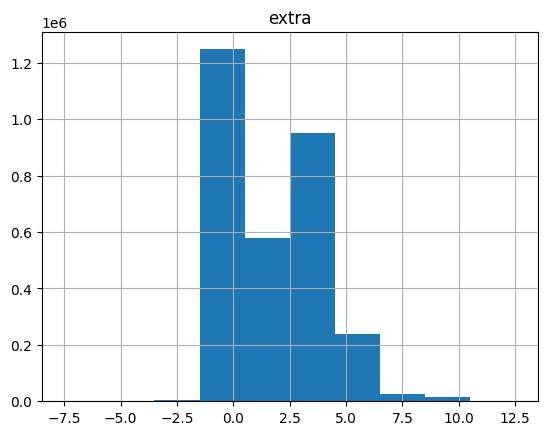

In [34]:
# Task 5
# Show the graphs

# Assuming you want to show a histogram for a specific column "histogram_column"
# Replace "histogram_column" with the actual column for the histogram
df.select("extra").toPandas().hist()


In [35]:
# Task 6
# Copy the data to another folder through PySpark command

# Assuming you want to copy the data to "/content/drive/MyDrive/new_folder"
output_folder = "/content/drive/MyDrive/new_folder"

# Write the DataFrame to a new Parquet file in the specified folder
df.write.parquet(output_folder, mode="overwrite")
